<a href="https://colab.research.google.com/github/LeiteGabriel/teste/blob/main/Canny_edge_detector_scikit_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grupo: Gabriel Leite de Sousa - 31861571

Canny Edge Detection
***********************

## Goal

In this chapter, we will learn about

  * Concept of Canny edge detection
  * Utilizar o Scikit Image para fazer a detecção de bordas: **scikit-image.feature.canny**
    
### Theory


Canny Edge Detection is a popular edge detection algorithm. It was developed by John F. Canny in 1986. It is a multi-stage algorithm and we will go through each stages.

1. **Noise Reduction**

Since edge detection is susceptible to noise in the image, first step is to remove the noise in the image with a 5x5 Gaussian filter. We have already seen this in previous chapters. 

2. **Finding Intensity Gradient of the Image**

Smoothened image is then filtered with a Sobel kernel in both horizontal and vertical direction to get first derivative in horizontal direction ($G_x$) and vertical direction ($G_y$). From these two images, we can find edge gradient and direction for each pixel as follows:

$$ Edge\_Gradient \; (G) = \sqrt{G_x^2 + G_y^2} $$
$$   Angle \; (\theta) = \tan^{-1} \bigg(\frac{G_y}{G_x}\bigg)  $$

Gradient direction is always perpendicular to edges. It is rounded to one of four angles representing vertical, horizontal and two diagonal directions.

3. **Non-maximum Suppression**

After getting gradient magnitude and direction, a full scan of image is done to remove any unwanted pixels which may not constitute the edge. For this, at every pixel, pixel is checked if it is a local maximum in its neighborhood in the direction of gradient. Check the image below:

![Non-Maximum Suppression](nms.jpg "Non-Maximum Suppresion")
       
        
Point A is on the edge ( in vertical direction). Gradient direction is normal to the edge. Point B and C are in gradient directions. So point A is checked with point B and C to see if it forms a local maximum. If so, it is considered for next stage, otherwise, it is suppressed ( put to zero).

In short, the result you get is a binary image with "thin edges".

4. **Hysteresis Thresholding**

This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, `minVal` and `maxVal`. Any edges with intensity gradient more than `maxVal` are sure to be edges and those below `minVal` are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to "sure-edge" pixels, they are considered to be part of edges. Otherwise, they are also discarded. See the image below:

![Hysteresis Thresholding](hysteresis.jpg "Hysteresis Thresholding")

The edge A is above the `maxVal`, so considered as "sure-edge". Although edge C is below `maxVal`, it is connected to edge A, so that also considered as valid edge and we get that full curve. But edge B, although it is above `minVal` and is in same region as that of edge C, it is not connected to any "sure-edge", so that is discarded. So it is very important that we have to select `minVal` and `maxVal` accordingly to get the correct result.

This stage also removes small pixels noises on the assumption that edges are long lines. 

So what we finally get is strong edges in the image.

In [1]:
%matplotlib inline

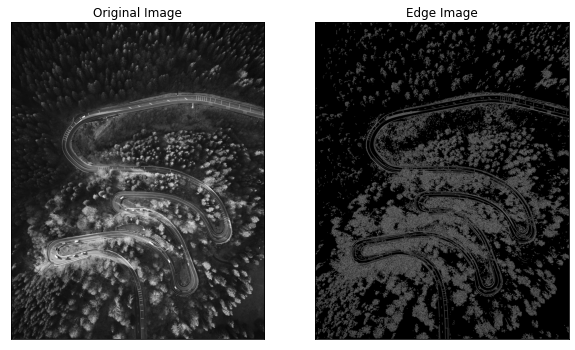

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io
from skimage import feature
from skimage.color import rgb2gray
from pylab import rcParams
from scipy import misc
rcParams['figure.figsize'] = 10, 10

img_c = io.imread('../images/teste1.jpg',0)
img = rgb2gray(img_c)
edges = feature.canny(img)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show() 

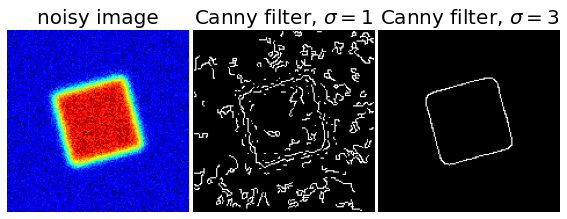

In [4]:
# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.jet)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                    bottom=0.02, left=0.02, right=0.98)

plt.show()

## Exercício


1. Estude a documentação do algoritmo **Canny** para descobrir parâmetros melhores e aumentar o número de linhas detectadas na imagem; explore os parâmetros e comente os resultados em pelo menos três imagens.
2. Pegue uma imagem com pouco ruído (em uma análise apenas visual); adicione ruído aleatório a esta imagem e faça a detecção de bordas nas duas (original e com ruído) utilizando filtros `Sobel`, `Prewitt` e o `Canny`. Comente os resultados obtidos.

**SUBMETA**:

1. Um notebook com todas as células de execução (output);
2. Um arquivo pdf gerado a partir do notebook com todas as células de execução (output).

---

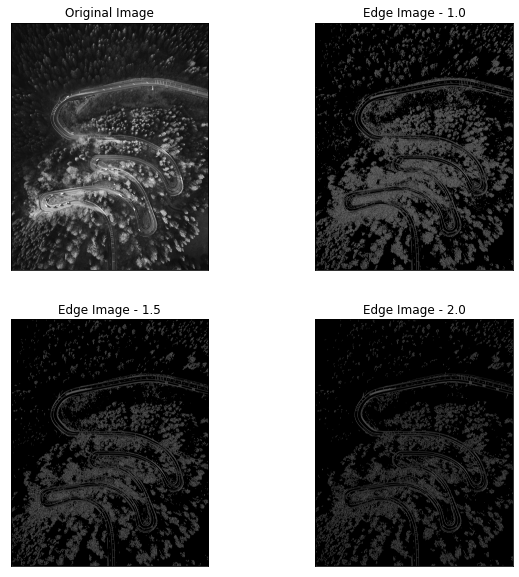

In [19]:
# Exercicio 1

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io
from skimage import feature
from skimage.color import rgb2gray
from pylab import rcParams
from scipy import misc
from skimage.util import random_noise
from skimage import filters


img_c = io.imread('../images/teste1.jpg',0)
img = rgb2gray(img_c)

edges1 = feature.canny(img, sigma=1.0, low_threshold=None, high_threshold=None, mask=None, use_quantiles=0.0)
edges2 = feature.canny(img, sigma=1.5, low_threshold=None, high_threshold=None, mask=None, use_quantiles=0.0)
edges3 = feature.canny(img, sigma=2.0, low_threshold=None, high_threshold=None, mask=None, use_quantiles=0.0)


plt.subplot(221),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(edges1,cmap = 'gray')
plt.title('Edge Image - 1.0'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(edges2,cmap = 'gray')
plt.title('Edge Image - 1.5'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(edges3,cmap = 'gray')
plt.title('Edge Image - 2.0'), plt.xticks([]), plt.yticks([])

plt.show()

Uma boa detecção ocorre ao podermos identificar todas as bordas possiveis na imagem, nesse caso identificamos isso no Edge Image - 1.5.

---

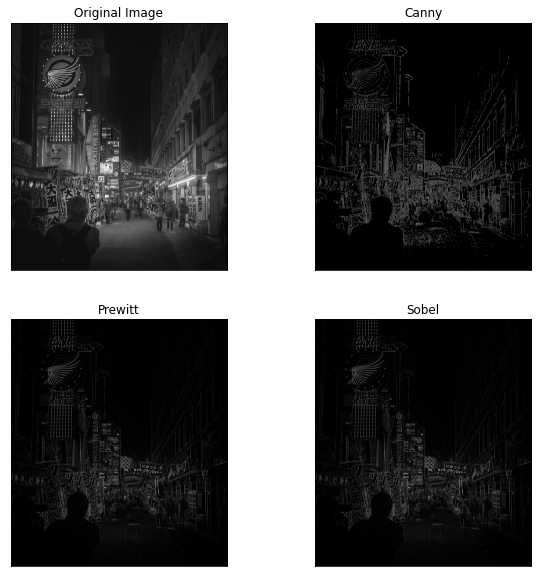

In [22]:
#Exercicio 2 (foto Original)
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io
from skimage import feature
from skimage.color import rgb2gray
from pylab import rcParams
from scipy import misc
from skimage import filters
from skimage.filters import sobel
from skimage.exposure import rescale_intensity

rcParams['figure.figsize'] = 10, 10

img_c = io.imread('../images/teste2.jpg',0)
img = rgb2gray(img_c)

Canny1 = feature.canny(img)
Prewitt1 = filters.prewitt(img)
Sobe1 = sobel(img)

plt.subplot(221),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(Canny1,cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(Prewitt1,cmap = 'gray')
plt.title('Prewitt'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(Sobe1,cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])
plt.show()

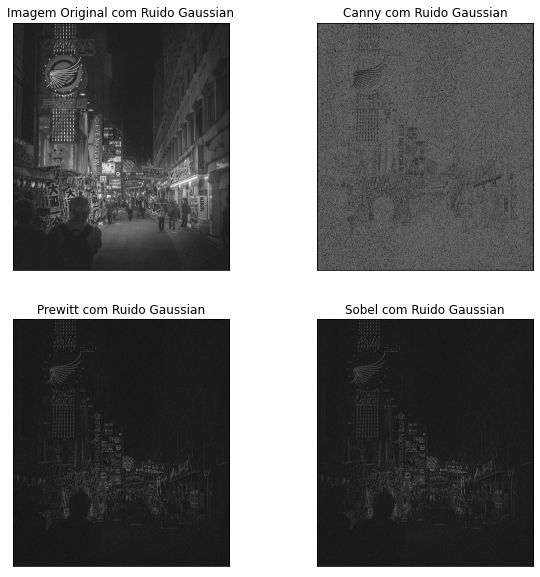

In [24]:
#Exercicio 2 (Foto com Ruido Gaussian)
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io
from skimage import feature
from skimage.color import rgb2gray
from pylab import rcParams
from scipy import misc
from skimage import filters
from skimage.filters import sobel
from skimage.exposure import rescale_intensity
from scipy.ndimage import generic_filter, correlate
from skimage import io
from skimage.filters import gaussian
from skimage.color import rgb2gray
from skimage.util import noise
from skimage.filters.rank import median
from skimage.restoration import denoise_bilateral

rcParams['figure.figsize'] = 10, 10

img_c = io.imread('../images/teste2.jpg',0)
img = rgb2gray(img_c)

gaussian = noise.random_noise(img, mode='gaussian', seed=None, clip=True)
Canny1 = feature.canny(gaussian)
Prewit1 = filters.prewitt(gaussian)
Sobel1 = sobel(gaussian)

plt.subplot(221),plt.imshow(gaussian,cmap = 'gray')
plt.title('Imagem Original com Ruido Gaussian'), plt.xticks([]),
plt.yticks([])
plt.subplot(222),plt.imshow(Canny1,cmap = 'gray')
plt.title('Canny com Ruido Gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(Prewit1,cmap = 'gray')
plt.title('Prewitt com Ruido Gaussian'), plt.xticks([]),
plt.yticks([])
plt.subplot(224),plt.imshow(Sobel1,cmap = 'gray')
plt.title('Sobel com Ruido Gaussian'), plt.xticks([]), plt.yticks([])
plt.show()

Tanto na imagem original quanto na imagem com ruido, ambos os algoritmos obtiveram os mesmos resultados, porêm com um pouco menos definição na imagem com ruído


---